In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline

## Reading the data from the cleaned Dataset

In [9]:
data = pd.read_csv("mbti_cleaned.csv")
data.dropna(inplace=True)

## Creating TF-IDF for features

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data['Posts'],data['type'], random_state=0)
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [11]:
x_train_counts = cv.fit_transform(x_train)
x_train_tfidf = tfidf.fit_transform(x_train_counts)

##  Tuning the Hyperparameter alpha

In [12]:
alpha = np.arange(0.00001,0.1,0.0001)
alpha = alpha[:50]
accuracy= []
for i in alpha:
    model = MultinomialNB(alpha = i)
    model.fit(x_train_tfidf,y_train)
    y_pred = model.predict(cv.transform(x_test))
    print("alpha is: ",i,"Accuracy is :",metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

alpha is:  1e-05 Accuracy is : 0.2888270746407047
alpha is:  0.00011 Accuracy is : 0.3031988873435327
alpha is:  0.00021 Accuracy is : 0.30783495595734817
alpha is:  0.00031000000000000005 Accuracy is : 0.3138618451553083
alpha is:  0.00041000000000000005 Accuracy is : 0.3143254520166898
alpha is:  0.00051 Accuracy is : 0.3147890588780714
alpha is:  0.0006100000000000001 Accuracy is : 0.3157162726008345
alpha is:  0.00071 Accuracy is : 0.3184979137691238
alpha is:  0.0008100000000000001 Accuracy is : 0.3189615206305053
alpha is:  0.0009100000000000001 Accuracy is : 0.3189615206305053
alpha is:  0.00101 Accuracy is : 0.32127955493741306
alpha is:  0.00111 Accuracy is : 0.3226703755215577
alpha is:  0.0012100000000000001 Accuracy is : 0.3231339823829393
alpha is:  0.0013100000000000002 Accuracy is : 0.3240611961057024
alpha is:  0.00141 Accuracy is : 0.32498840982846544
alpha is:  0.00151 Accuracy is : 0.32498840982846544
alpha is:  0.00161 Accuracy is : 0.32637923041261013
alpha is:  0.

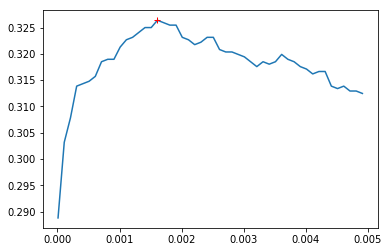

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alpha,accuracy)
plt.plot(alpha[accuracy.index(max(accuracy))],max(accuracy),"r+")
plt.show()

In [18]:
print(max(accuracy))
alpha[accuracy.index(max(accuracy))]
#best alpha = 0.0016

0.32637923041261013


0.00161

## Final Model

In [21]:
model = MultinomialNB(alpha = 0.0016)
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(cv.transform(x_test))

In [22]:
metrics.accuracy_score(y_test,y_pred) # model's Accuracy

0.32637923041261013